### histogram equalization

##### generalized h.e.

improves contrast by using whole colorspace range

##### contrast limited adaptive h.e.

same thing, on smaller chunks of image

https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html

###### NB ONLY FOR GRAYSCALED IMAGES

clahe method performs better avoiding to introduce too much bright pixels (added by ghe in the deep), but can be seen that in lowers the amount of "purely white" pixels, possibly this can harm contours recognition

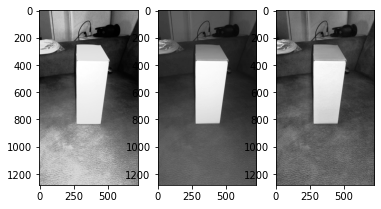

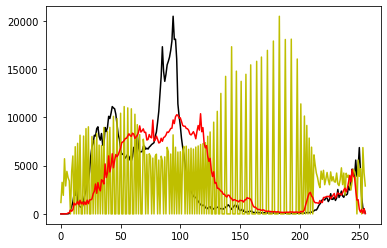

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy

image=cv2.cvtColor(cv2.imread('../zimages/box/box2.jpg'),cv2.COLOR_BGR2GRAY)

hist,_ = np.histogram(image.flatten(),256,[0,256])

gehim=cv2.equalizeHist(image)
gehist,_=np.histogram(gehim.flatten(),256,[0,256])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
claheim= clahe.apply(image)
clahehist,_=np.histogram(claheim.flatten(),256,[0,256])

plt.subplot(1,3,1)
plt.imshow(gehim,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(image,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(claheim,cmap='gray')
plt.show()

plt.plot(hist,color = 'k')
plt.plot(gehist,color = 'y')
plt.plot(clahehist,color = 'r')
plt.show()

### normalization and equalization

**normalization** lets redefine min and max intensity : mapping to minNew and maxNew range

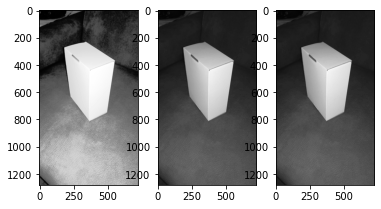

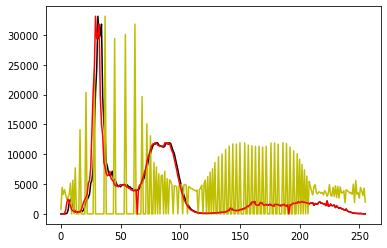

1


In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.cvtColor(cv2.imread('../zimages/box/box4.jpg'),cv2.COLOR_BGR2GRAY)
hist,_ = np.histogram(image.flatten(),256,[0,256])

minNew=0
maxNew=255
normim=cv2.normalize(image,None,minNew,maxNew,cv2.NORM_MINMAX)
normhist,_=np.histogram(normim.flatten(),256,[0,256])
normhist,_=np.histogram(normim.flatten(),256,[0,256])
eqim=cv2.equalizeHist(image)
eqhist,_=np.histogram(eqim.flatten(),256,[0,256])

plt.subplot(1,3,1)
plt.imshow(eqim,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(image,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(normim,cmap='gray')
plt.show()

plt.plot(hist,color = 'k')
plt.plot(eqhist,color = 'y')
plt.plot(normhist,color = 'r')
plt.show()
#print(min(hist[hist>0]))


### effects on grayscaling and filtering order
almost no difference, more noticiable if the kernel of the filter gets smaller and the action gets bigger; hence the bilateral filter may be used before/after grayscale conversion

grayscale conversion seems to "compress the histogram toward the center of a valley-peak-valley area"

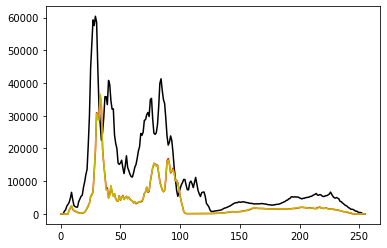

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.cvtColor(cv2.imread('../zimages/box/box4.jpg'),cv2.COLOR_BGR2RGB)
imagegray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# bilateral filter on original and copy
fltparam=(21,51,51)
image=cv2.bilateralFilter(image,fltparam[0],fltparam[1],fltparam[2])
imagegray=cv2.bilateralFilter(imagegray,fltparam[0],fltparam[1],fltparam[2])

#reconversion of gray/conversion of colored filtered
#new=cv2.cvtColor(imagegray,cv.COLOR_GRAY2RGB) #CAN'T GO BACK since channels were merged
newgray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#histogram comparison
histng,_ = np.histogram(newgray,256,[0,256])
histg,_ = np.histogram(imagegray,256,[0,256])
hist,_ = np.histogram(image,256,[0,256])
plt.plot(hist,color = 'k')
plt.plot(histg,color = 'r')
plt.plot(histng,color = 'y')
plt.show()

### effect of bilateral filter on histogram

as expected, bilateral filter makes the histogram "more sharp" with steeper changes, since it enhances the edges.
must be noted that, as reported in the last chart, the histogram of merged and filtered channels is not identical to the one of the filtered original image, but the changes are not straightforward; for practiticity filter will be used on the full channel image directly


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('body/box/box2.jpg')
hist,_=np.histogram(image,256,[0,256])
imager,imageg,imageb = cv2.split(image)
histr,_ = np.histogram(imager,256,[0,256])
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
plt.plot(hist,color = 'y')
plt.plot(histr,color = 'r')
plt.plot(histg,color = 'g')
plt.plot(histb,color = 'b')
plt.show()

fltparam=(21,51,51)
fimage=cv2.bilateralFilter(image,fltparam[0],fltparam[1],fltparam[2])
fimager=cv2.bilateralFilter(imager,fltparam[0],fltparam[1],fltparam[2])
fimageg=cv2.bilateralFilter(imageg,fltparam[0],fltparam[1],fltparam[2])
fimageb=cv2.bilateralFilter(imageb,fltparam[0],fltparam[1],fltparam[2])
fhist,_=np.histogram(fimage,256,[0,256])
fhistr,_ = np.histogram(fimager,256,[0,256])
fhistg,_ = np.histogram(fimageg,256,[0,256])
fhistb,_ = np.histogram(fimageb,256,[0,256])
plt.plot(fhist,color = 'k')
plt.plot(hist,color = 'y')
plt.show()
plt.plot(fhistr,color = 'k')
plt.plot(histr,color = 'r')
plt.show()
plt.plot(fhistg,color = 'k')
plt.plot(histg,color = 'g')
plt.show()
plt.plot(fhistb,color = 'k')
plt.plot(histb,color = 'b')
plt.show()

fmergimage=cv2.merge((fimager,fimageg,fimageb))
fmerghist,_=np.histogram(fmergimage,256,[0,256])
plt.plot(fhist,color = 'k')
plt.plot(hist,color = 'y')
plt.plot(fmerghist,color = 'b')
plt.show()